In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_excel('cancer2.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
df = pd.DataFrame(data)

In [7]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [9]:
df.corr() # Korelasyon

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.009259
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.142896
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.692319
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.656258
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.555812
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.589991
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.640261
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.593938
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.755926
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.791475


<Axes: >

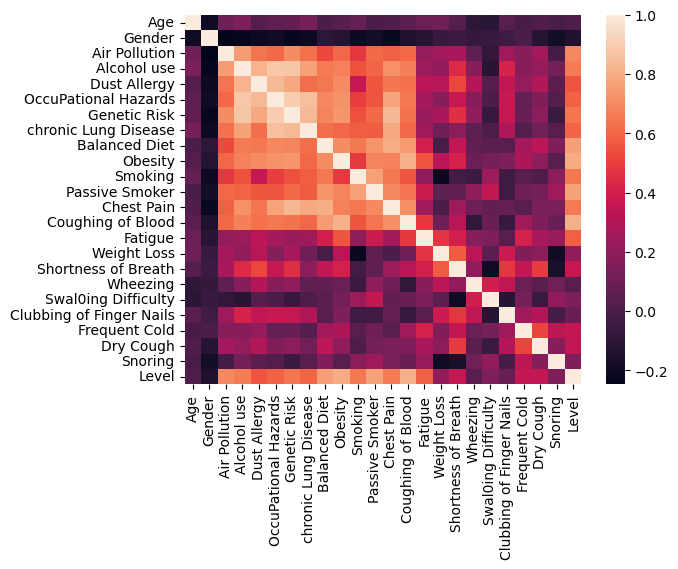

In [67]:
import seaborn as sns #Korelasyon
sns.heatmap(df.corr())

In [10]:
df.corr().nlargest(3,'Level')

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Level,0.009259,-0.142896,0.692319,0.656258,0.555812,0.589991,0.640261,0.593938,0.755926,0.791475,...,0.585657,0.210899,0.361417,0.040095,0.148020,0.090597,0.349702,0.343123,0.155030,1.000000
Coughing of Blood,0.053006,-0.146505,0.607829,0.667612,0.625291,0.645947,0.632236,0.602987,0.745054,0.814805,...,0.481540,0.105857,0.318777,-0.085698,0.086289,-0.066443,0.244235,0.147659,0.087944,0.805834
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.791475


In [11]:
X = df[['Obesity','Coughing of Blood']]
y = df['Level']

In [17]:
#Eğitim Aşaması

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = knn.predict(X_test)

In [71]:
# Sınıflandırma raporunu hesaplayama

In [72]:

classification_rep = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(classification_rep)

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       118
           1       0.92      1.00      0.96        82

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [73]:
#performans metriklerini

In [74]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [75]:
print("Doğruluk :", accuracy)
print("Hassasiyet :", precision)
print("Özgüllük :", recall)
print("F1 Skoru:", f1)

Doğruluk : 0.965
Hassasiyet : 0.9213483146067416
Özgüllük : 1.0
F1 Skoru: 0.9590643274853802


In [76]:
# Karmaşıklık matrisini hesaplayalım
cm = confusion_matrix(y_test, y_pred)
print("Karmaşıklık Matrisi:")
print(cm)

Karmaşıklık Matrisi:
[[111   7]
 [  0  82]]


Text(0.5, 0, 'Tahmin Edilen Etiketler')

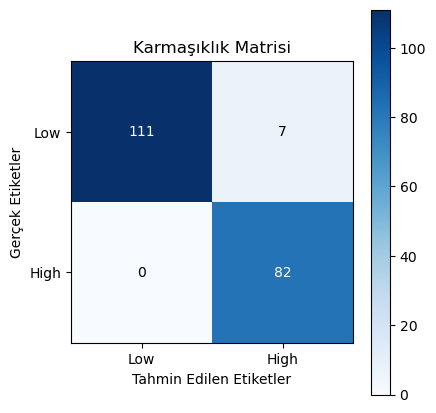

In [77]:
# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Karmaşıklık Matrisi')
plt.colorbar()
classes = ['Low', 'High']
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
plt.ylabel('Gerçek Etiketler')
plt.xlabel('Tahmin Edilen Etiketler')

In [78]:
# AUC değerini hesaplama

In [79]:
y_scores = knn.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_scores)
print("AUC Değeri:", auc_score)

AUC Değeri: 0.9703389830508475


In [65]:
# ROC eğrisini çizme

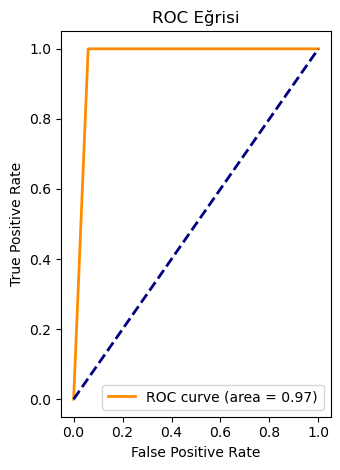

In [35]:

plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
# Özellikleri ölçeklendirin (standardize edin)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
# Yapay Sinir Ağı modeli

In [61]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [62]:
# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
# Modeli eğitimi
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.6214 - accuracy: 0.6963 - val_loss: 0.5120 - val_accuracy: 0.9400
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.9013 - val_loss: 0.3643 - val_accuracy: 0.9400
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8888 - val_loss: 0.2546 - val_accuracy: 0.9350
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.8950 - val_loss: 0.1983 - val_accuracy: 0.9550
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9000 - val_loss: 0.1752 - val_accuracy: 0.9350
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.8975 - val_loss: 0.1656 - val_accuracy: 0.9450
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9087 - val_loss: 0.1611 - val_accuracy: 0.9450
Epoch 8/50
25/25 [==

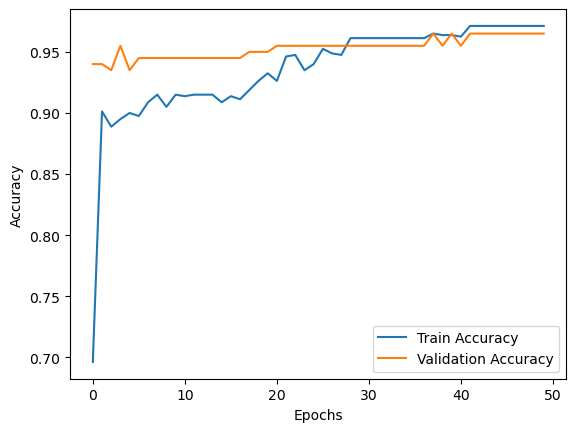

In [64]:
# görselleştirme
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
# Modelin test verisi üzerinde performansını değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Verisi Doğruluğu: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9650
Test Verisi Doğruluğu: 0.9649999737739563
